In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv(r"C:\Users\Administrateur\Ironhack\LAB\DAFT_212\Final_project\Compteurs\Cleaned\Comptage_merged.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,compteur_id,compteur_name,site_compteur_id,comptage_horaire,date_heure_comptage,date_instal,date_comptage,heure_comptage,latitude,longitude
0,0,0,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,0.0,2021-03-01T04:00:00+01:00,2012-02-22,2021-03-01,4,48.83511,2.33338
1,1,1,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,5.0,2021-03-01T06:00:00+01:00,2012-02-22,2021-03-01,6,48.83511,2.33338
2,2,2,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,0.0,2021-03-01T03:00:00+01:00,2012-02-22,2021-03-01,3,48.83511,2.33338
3,3,3,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,1.0,2021-03-01T05:00:00+01:00,2012-02-22,2021-03-01,5,48.83511,2.33338
4,4,4,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,37.0,2021-03-01T09:00:00+01:00,2012-02-22,2021-03-01,9,48.83511,2.33338


In [5]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'compteur_id', 'compteur_name',
       'site_compteur_id', 'comptage_horaire', 'date_heure_comptage',
       'date_instal', 'date_comptage', 'heure_comptage', 'latitude',
       'longitude'],
      dtype='object')

In [6]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
data

,compteur_id,compteur_name,site_compteur_id,comptage_horaire,date_heure_comptage,date_instal,date_comptage,heure_comptage,latitude,longitude
0,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,0.0,2021-03-01T04:00:00+01:00,2012-02-22,2021-03-01,4,48.835110,2.333380
1,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,5.0,2021-03-01T06:00:00+01:00,2012-02-22,2021-03-01,6,48.835110,2.333380
2,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,0.0,2021-03-01T03:00:00+01:00,2012-02-22,2021-03-01,3,48.835110,2.333380
3,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,1.0,2021-03-01T05:00:00+01:00,2012-02-22,2021-03-01,5,48.835110,2.333380
4,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,37.0,2021-03-01T09:00:00+01:00,2012-02-22,2021-03-01,9,48.835110,2.333380
...,...,...,...,...,...,...,...,...,...,...
2293476,100047551-102047551,Pont du Garigliano SE-NO SE-NO,100047551.0,2.0,2018-12-25T01:00:00+01:00,2018-12-06,2018-12-25,1,48.839883,2.267099
2293477,100047551-102047551,Pont du Garigliano SE-NO SE-NO,100047551.0,13.0,2018-12-25T14:00:00+01:00,2018-12-06,2018-12-25,14,48.839883,2.267099
2293478,100047551-102047551,Pont du Garigliano SE-NO SE-NO,100047551.0,1.0,2018-12-28T01:00:00+01:00,2018-12-06,2018-12-28,1,48.839883,2.267099
2293479,100047551-102047551,Pont du Garigliano SE-NO SE-NO,100047551.0,1.0,2018-12-29T02:00:00+01:00,2018-12-06,2018-12-29,2,48.839883,2.267099


In [7]:
data.dtypes

compteur_id             object
compteur_name           object
site_compteur_id       float64
comptage_horaire       float64
date_heure_comptage     object
date_instal             object
date_comptage           object
heure_comptage           int64
latitude               float64
longitude              float64
dtype: object

In [8]:
data['date_comptage'].value_counts()

2022-01-05    2345
2021-07-23    2328
2021-05-25    2328
2021-05-24    2328
2021-05-23    2328
              ... 
2018-05-02     336
2018-03-25     334
2019-12-31      81
2018-12-31      45
2021-02-25       2
Name: date_comptage, Length: 1498, dtype: int64

In [9]:
data_TS=data[['date_comptage', 'comptage_horaire']].groupby(by='date_comptage').sum()
data_TS.head()

,comptage_horaire
date_comptage,
2018-01-01,1332.0
2018-01-02,4036.0
2018-01-03,3716.0
2018-01-04,3907.0
2018-01-05,5396.0


In [10]:
data_TS_2018=data_TS.loc[(data_TS.index<'2019-01-01')]
data_TS_2018.head()

,comptage_horaire
date_comptage,
2018-01-01,1332.0
2018-01-02,4036.0
2018-01-03,3716.0
2018-01-04,3907.0
2018-01-05,5396.0


In [11]:
data_TS_2019=data_TS.loc[(data_TS.index>'2018-12-31') & (data_TS.index<'2020-01-01')]
data_TS_2019.head()

,comptage_horaire
date_comptage,
2019-01-01,16494.0
2019-01-02,29655.0
2019-01-03,34463.0
2019-01-04,34933.0
2019-01-05,26668.0


In [12]:
data_TS_2020=data_TS.loc[(data_TS.index>'2019-12-31') & (data_TS.index<'2021-01-01')]
data_TS_2020.head()

,comptage_horaire
date_comptage,
2020-01-01,47609.0
2020-01-02,107474.0
2020-01-03,118533.0
2020-01-04,100113.0
2020-01-05,80912.0


In [13]:
data_TS_2021=data_TS.loc[(data_TS.index>'2020-12-31') & (data_TS.index<'2022-01-01')]
data_TS_2021.head()

,comptage_horaire
date_comptage,
2021-02-25,1.0
2021-03-01,146887.0
2021-03-02,169515.0
2021-03-03,164748.0
2021-03-04,150373.0


In [14]:
data_TS_2022=data_TS.loc[(data_TS.index>'2021-12-31')]
data_TS_2022.head()

,comptage_horaire
date_comptage,
2022-01-01,71423.0
2022-01-02,75018.0
2022-01-03,103303.0
2022-01-04,105205.0
2022-01-05,137563.0


In [15]:
data_TS.dtypes

comptage_horaire    float64
dtype: object

In [16]:
data_TS.index=pd.to_datetime(data_TS.index)

In [17]:
data_TS.to_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\Final_project\Compteurs\Cleaned\Time_series.csv')

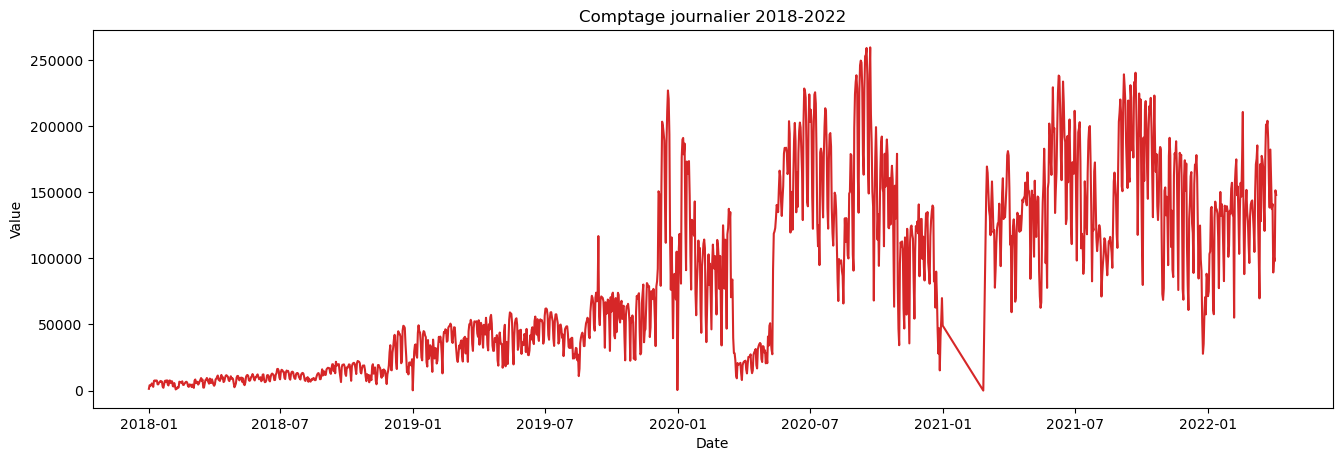

In [18]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_TS, x=data_TS.index, y=data_TS.comptage_horaire, title='Comptage journalier 2018-2022')  

A noter : périodicité hebdomadaire

Cette courbe générale nous donne plusieurs axes d’analyse : la périodicité (mensuelle, hebdomadaire, journalière, horaire), les évènements récurrents (jour férié, vacances, météo) et les évènements exceptionnels (grève, Covid, confinements).

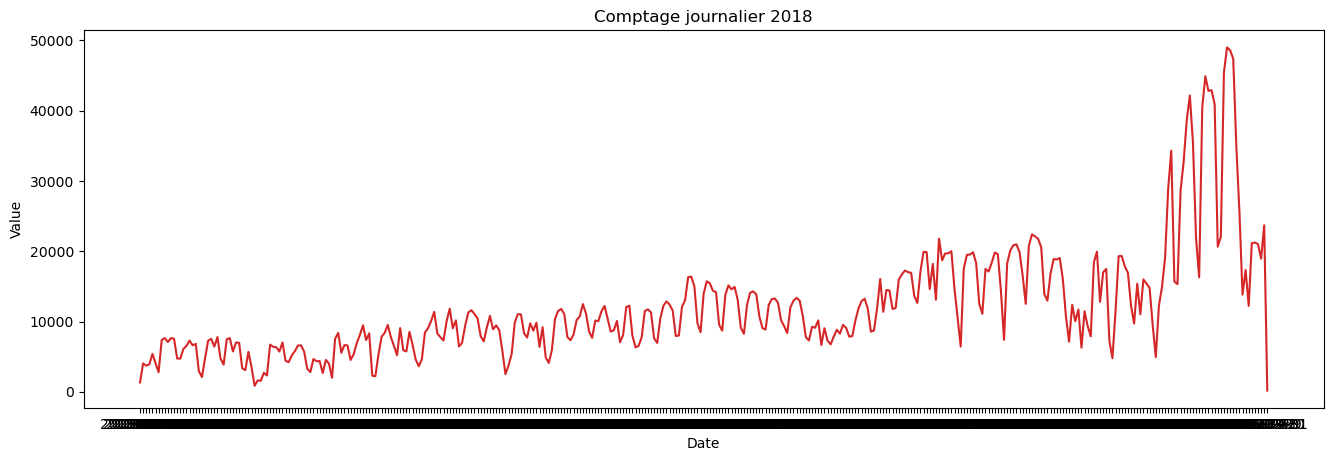

In [19]:
plot_df(data_TS_2018, x=data_TS_2018.index, y=data_TS_2018.comptage_horaire, title='Comptage journalier 2018')  

Evolutions 2018 :

- Grève des transport Dec-19 en lien avec les gilets jaunes

In [20]:
data_TS_2018_dec=data_TS.loc[(data_TS.index>'2018-11-30') & (data_TS.index<'2019-01-01')]
data_TS_2018_dec

,comptage_horaire
date_comptage,
2018-12-01,15678.0
2018-12-02,15322.0
2018-12-03,28644.0
2018-12-04,32764.0
2018-12-05,38698.0
2018-12-06,42163.0
2018-12-07,35405.0
2018-12-08,21826.0
2018-12-09,16292.0


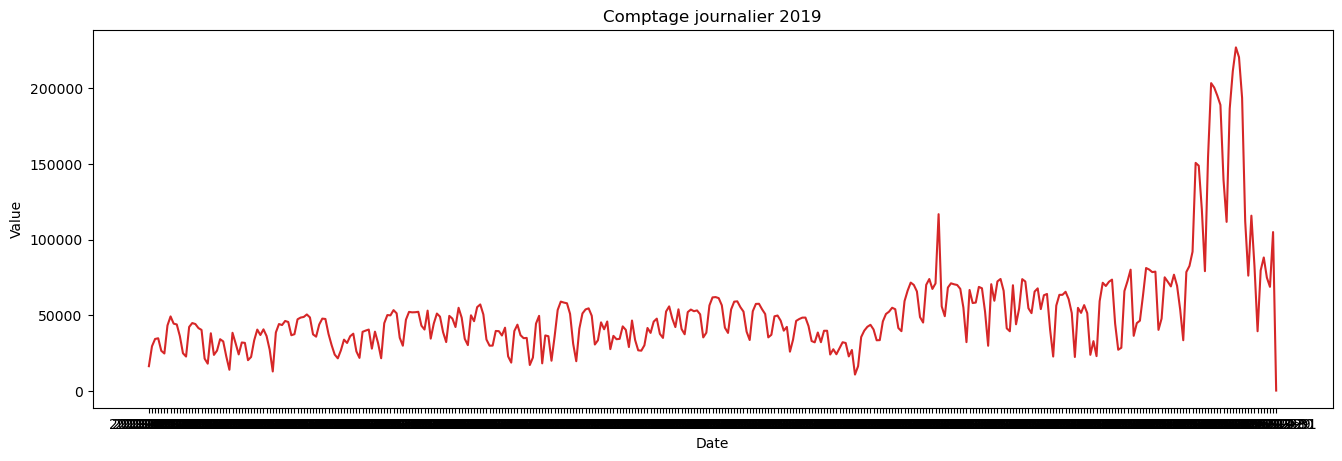

In [21]:
plot_df(data_TS_2019, x=data_TS_2019.index, y=data_TS_2019.comptage_horaire, title='Comptage journalier 2019')  

Evolutions 2019 :

- Pic grève des transport Sept-19 (13/09/19, 24/09/19)
- Pic grève des transports Dec-19 (5/12/19-20/02/20)
- Baisse provisoire pendant les vacances de Noël

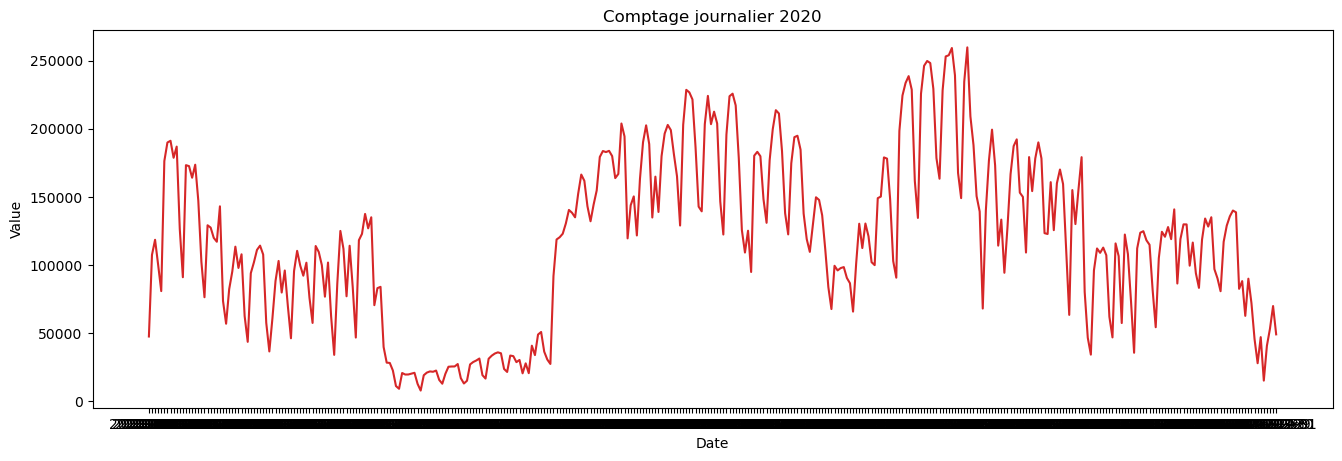

In [22]:
plot_df(data_TS_2020, x=data_TS_2020.index, y=data_TS_2020.comptage_horaire, title='Comptage journalier 2020')  

Evolutions 2020 : 
- Baisse fin Janvier lorsque la grève des transports commencée le 5/12/19 termine le 27/01/20
- 1er confinement (17/03/20-10/05/20)
- Reprise au déconfinement 
- Tassement en Aout-20 pendant les vacances scolaires
- Rentrée Sept-20, le trafic atteint des sommets, plus élevés qu’en période de grève (mois le plus chaud jamais enregistré en France + effets du covid : peur des transports publics, création de 50 km de pistes cyclables par la Mairie de Paris, aides publiques pour l'achat ou la réparation de vélos
- Baisse du trafic en Oct-20
- 2e confinement le 30/09/20 (moins sévère que le premier)
- vacances de Noël, sous couvre-feu, et le trafic s’effondre à nouveau.
    

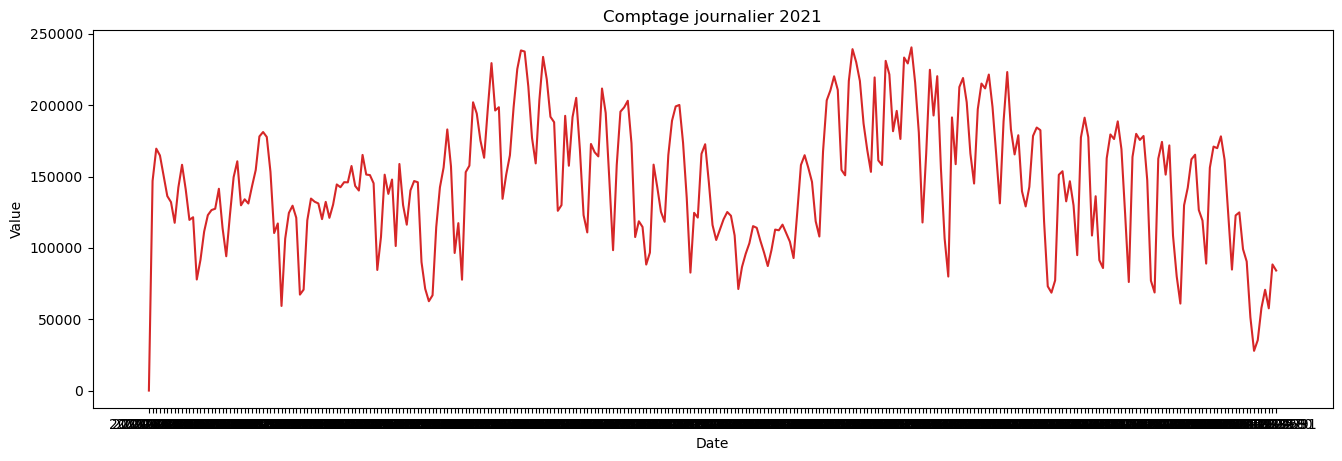

In [23]:
plot_df(data_TS_2021, x=data_TS_2021.index, y=data_TS_2021.comptage_horaire, title='Comptage journalier 2021')  

Evolutions 2021 :
- Pas de data pour Jan-21, Feb-21
- Creux vacances été Aout-20
- Couvre feu Jan-21 (18h) puis mi-mars-21 (19h) puis mi-mai (21h) - fin 20/06/21

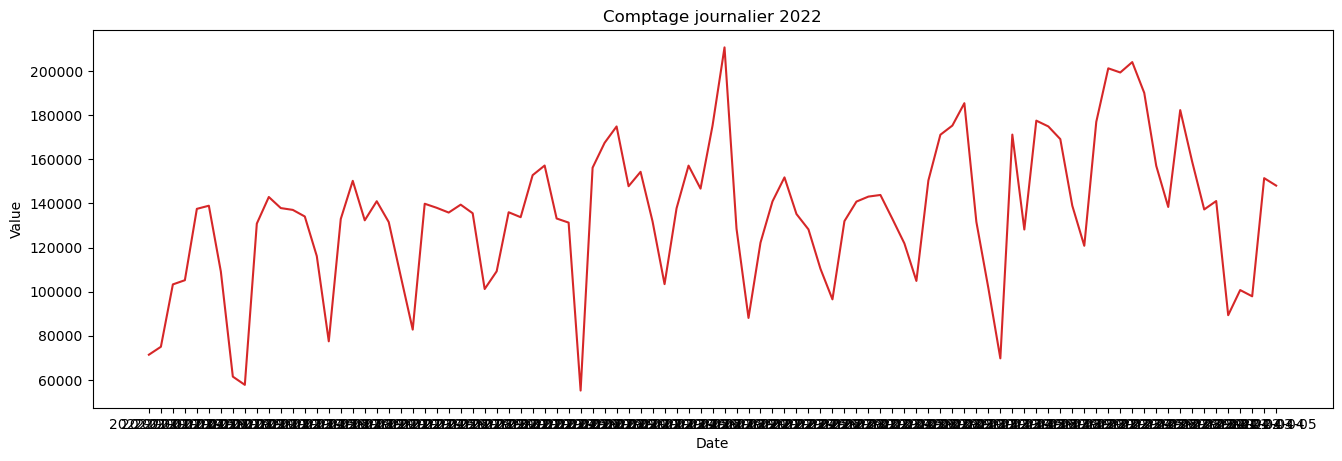

In [24]:
plot_df(data_TS_2022, x=data_TS_2022.index, y=data_TS_2022.comptage_horaire, title='Comptage journalier 2022')  

Evolutions 2022 :
- Périodicité (semaine vs. weekend)

In [25]:
data_TS_2022_focus=data_TS_2022.loc[(data_TS_2022.index>='2022-01-01') & (data_TS_2022.index<'2022-02-28')]
data_TS_2022_focus

,comptage_horaire
date_comptage,
2022-01-01,71423.0
2022-01-02,75018.0
2022-01-03,103303.0
2022-01-04,105205.0
2022-01-05,137563.0
2022-01-06,138984.0
2022-01-07,109140.0
2022-01-08,61484.0
2022-01-09,57750.0


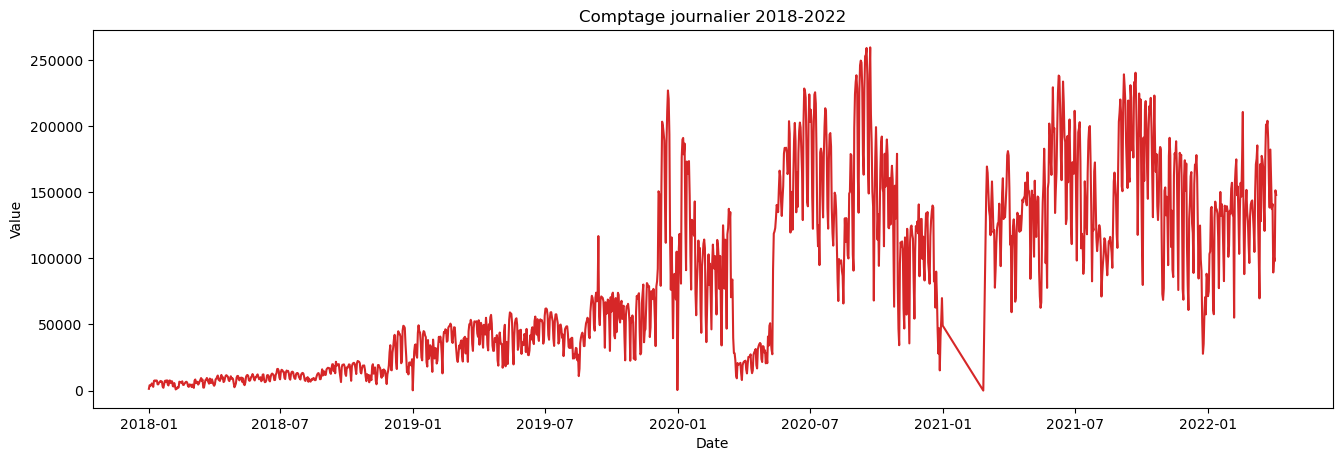

In [26]:
plot_df(data_TS, x=data_TS.index, y=data_TS.comptage_horaire, title='Comptage journalier 2018-2022')  

In [27]:
data_TS['year'] = [d.year for d in data_TS.index]
data_TS['month'] = [d.strftime('%b') for d in data_TS.index]
years = data_TS['year'].unique()
data_TS.head()

,comptage_horaire,year,month
date_comptage,,,
2018-01-01,1332.0,2018,Jan
2018-01-02,4036.0,2018,Jan
2018-01-03,3716.0,2018,Jan
2018-01-04,3907.0,2018,Jan
2018-01-05,5396.0,2018,Jan


In [28]:
years

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

In [29]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

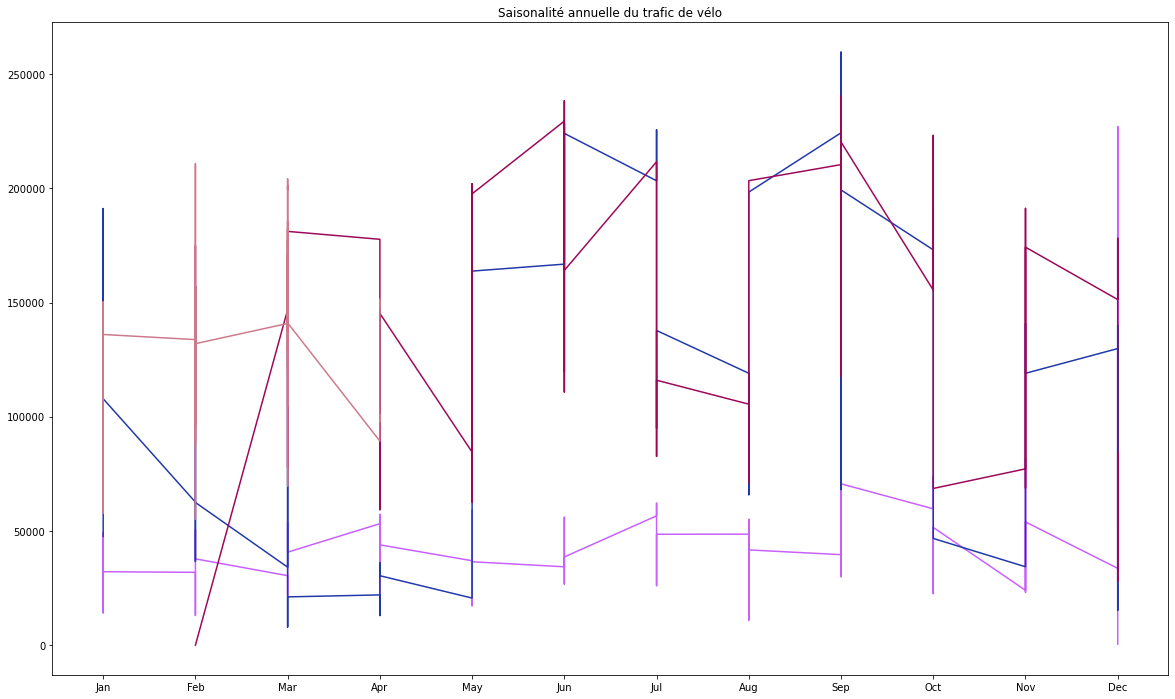

In [30]:
# Pb sur le plot - j'ai enlevé les plt.text car je ne comprenais pas les arguments dedans
plt.figure(figsize=(20,12))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'comptage_horaire', data=data_TS.loc[data_TS.year==y, :], color=mycolors[i], label=y)
plt.title("Saisonalité annuelle du trafic de vélo")
plt.show()

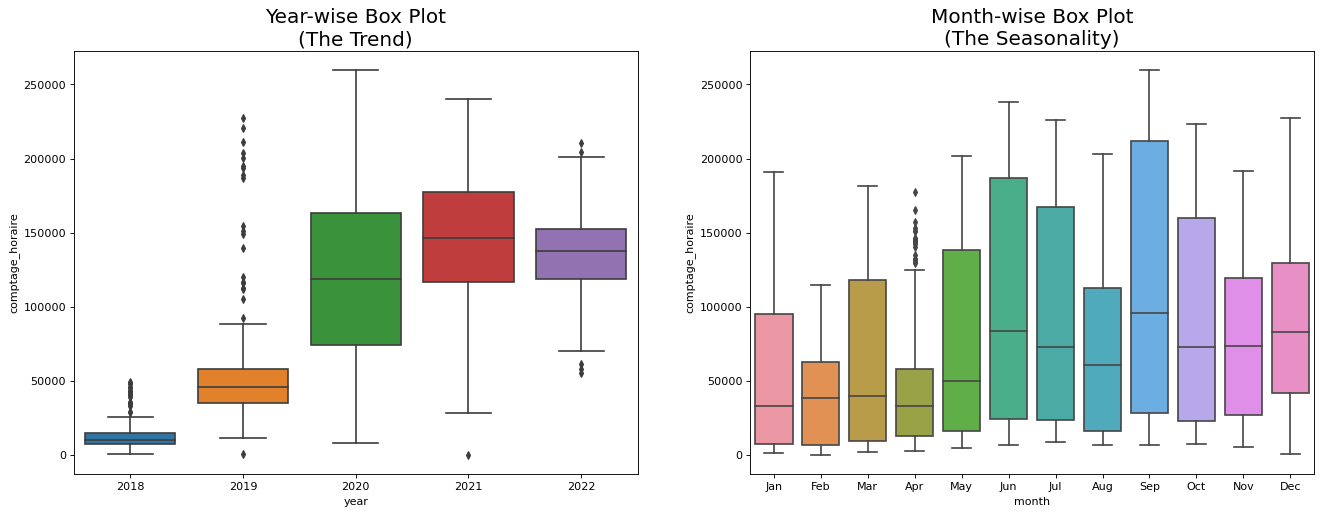

In [31]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='comptage_horaire', data=data_TS, ax=axes[0])
sns.boxplot(x='month', y='comptage_horaire', data=data_TS.loc[~data_TS.year.isin([2000, 2022]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [32]:
data_TS.drop(['year', 'month'], axis=1, inplace=True)

In [33]:
data_TS.head()

,comptage_horaire
date_comptage,
2018-01-01,1332.0
2018-01-02,4036.0
2018-01-03,3716.0
2018-01-04,3907.0
2018-01-05,5396.0


# Decomposition

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11988/1351403165.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_mul = seasonal_decompose(data_TS['comptage_horaire'], model='multiplicative',freq=20, extrapolate_trend='freq')
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11988/1351403165.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add = seasonal_decompose(data_TS['comptage_horaire'], model='additive', freq=60)


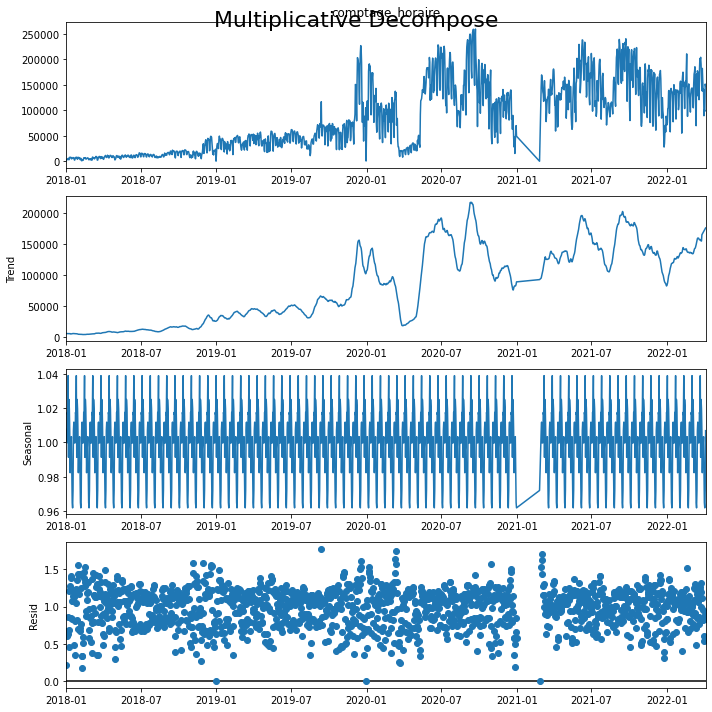

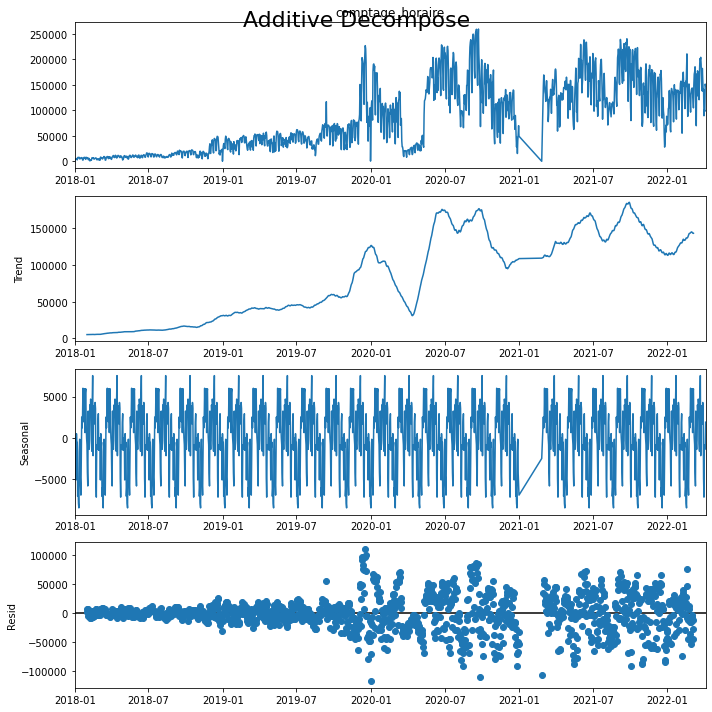

In [34]:
# Decomposition 
result_mul = seasonal_decompose(data_TS['comptage_horaire'], model='multiplicative',freq=20, extrapolate_trend='freq')
result_add = seasonal_decompose(data_TS['comptage_horaire'], model='additive', freq=60)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

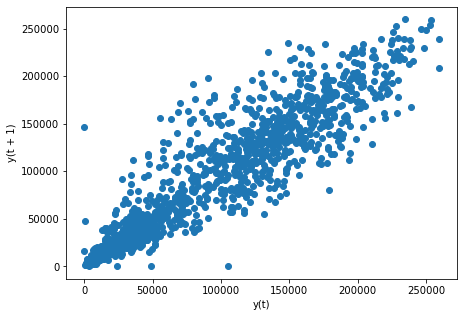

In [35]:
# Detect autocorrelation
plt.rcParams.update({'figure.figsize': (7,5)})
pd.plotting.lag_plot(data_TS['comptage_horaire'], lag=1)

From Lab20, Autocorrelation in time series means that the series is linearly related to a lagged version of itself. For features 'rotationRate.x' and 'userAcceleration.x', the observations at time t have a positive linear correlation with the observations at time t+1. One of the assumptions of regression analysis is that the data has no autocorrelation. If we try to do a regression analysis on data with autocorrelation, then our analysis will be misleading.

# Test for stationarity

In [36]:
# ADF Test
# Ho = TS is not stationary
# H1 = TS is stationary

result = adfuller(data_TS.comptage_horaire.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
# p-value highly above 5% -> we accept Ho -> TS not stationary

ADF Statistic: -2.3498591838387526
p-value: 0.15639098051721606
Critial Values:
   1%, -3.434791163965702
Critial Values:
   5%, -2.8635014840083945
Critial Values:
   10%, -2.5678142741740877


In [37]:
# KPSS Test
# Ho = TS is stationary
# H1 = TS is not stationary

result = kpss(data_TS.comptage_horaire.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
# p-value below 5% -> we reject Ho -> TS not stationary


KPSS Statistic: 4.774626
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# Transforming non-stationary series

In [38]:
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
# use diff between the points 
data=data_TS.copy()
data['Difference'] = data_TS['comptage_horaire'].diff()
#Attention ne pas oublier pour ne pas avoir d'erreur sur l'évaluation du modèle la fin (RMSE) 
data.dropna(inplace=True)
data.head()

,comptage_horaire,Difference
date_comptage,,
2018-01-02,4036.0,2704.0
2018-01-03,3716.0,-320.0
2018-01-04,3907.0,191.0
2018-01-05,5396.0,1489.0
2018-01-06,4080.0,-1316.0


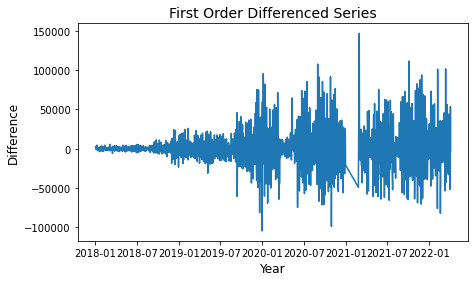

In [39]:
# Plot the Change
plt.figure(figsize=(7,4))
plt.plot(data['Difference'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

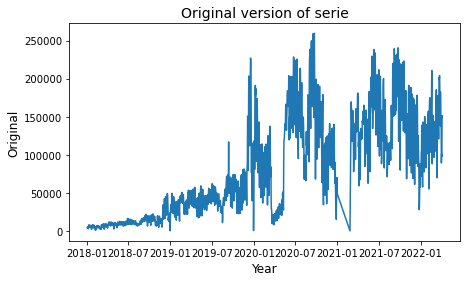

In [40]:
plt.figure(figsize=(7,4))
plt.plot(data['comptage_horaire'])
plt.title('Original version of serie', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Original', fontsize=12)
plt.show()

In [41]:
#Re-run ADF on new TS made with diff above
result = adfuller(data.Difference.dropna())
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

# p-value lower than 5%, we reject null hypothesis and conclude that TS is now stationary

(-10.27512299164128, 3.9088595097940184e-18, 24, 1472, {'1%': -3.4348002311087007, '5%': -2.8635054856234343, '10%': -2.5678164050869863}, 33090.73041290323)
ADF Test Statistic: -10.28
5% Critical Value: -2.86
p-value: 0.00


# Detrending TS

Text(0.5, 1.0, 'Traffic detrended by subtracting the least squares fit')

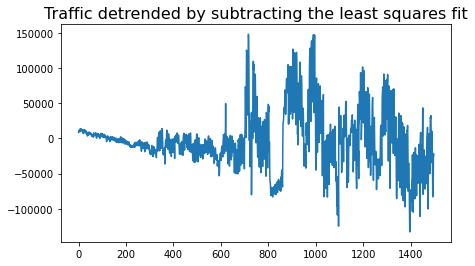

In [42]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(data_TS.comptage_horaire.values)
plt.figure(figsize=(7,4))
plt.plot(detrended)
plt.title('Traffic detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Traffic detrended by subtracting the trend component')

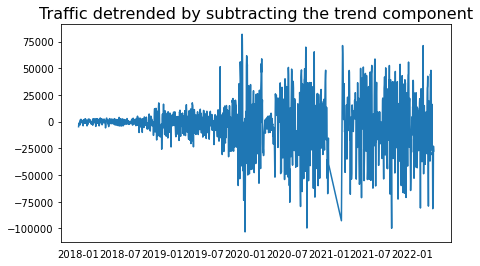

In [63]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
detrended = data_TS.comptage_horaire.values - result_mul.trend
plt.figure(figsize=(7,4))
plt.plot(detrended)
plt.title('Traffic detrended by subtracting the trend component', fontsize=16)

# Deseasonalized TS

[]

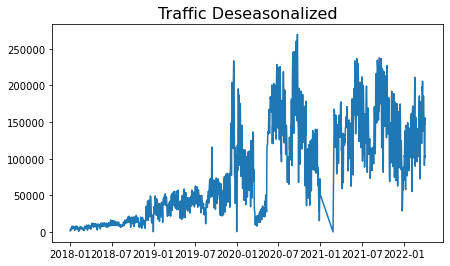

In [43]:
# Deseasonalize
deseasonalized = data_TS.comptage_horaire.values / result_mul.seasonal

# Plot
plt.figure(figsize=(7,4))
plt.plot(deseasonalized)
plt.title('Traffic Deseasonalized', fontsize=16)
plt.plot()

# Test seasonality

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

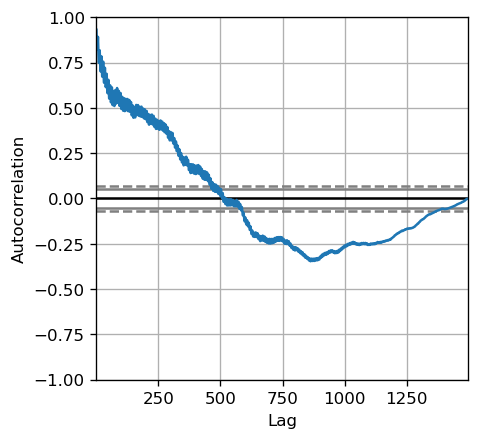

In [44]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':120})
autocorrelation_plot(data_TS.comptage_horaire.tolist())

C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


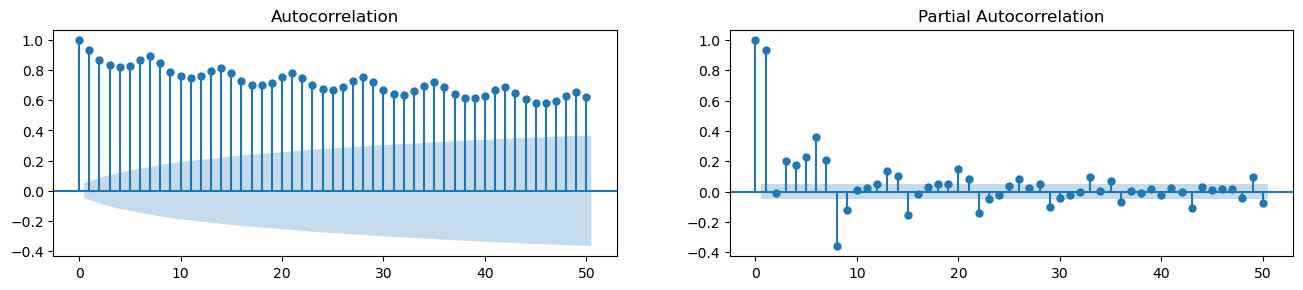

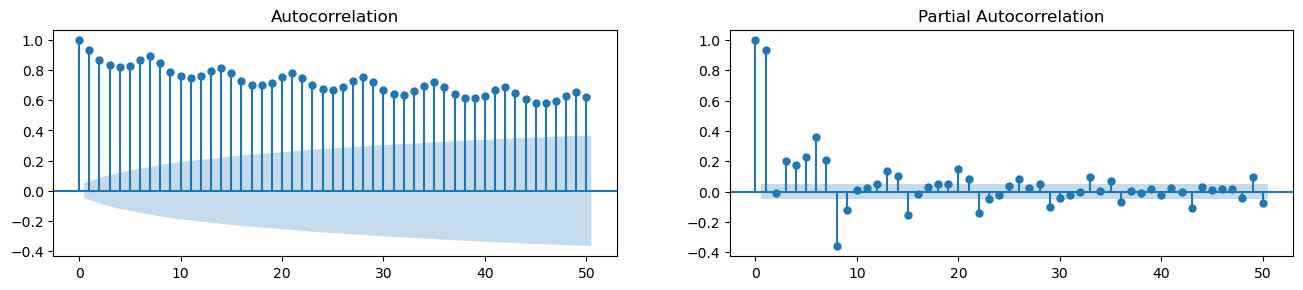

In [45]:
#ACF

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
acf_50 = acf(data_TS.comptage_horaire, nlags=50)
pacf_50 = pacf(data_TS.comptage_horaire, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data_TS.comptage_horaire.tolist(), lags=50, ax=axes[0])
plot_pacf(data_TS.comptage_horaire.tolist(), lags=50, ax=axes[1])

In [46]:
#Code for Durbin Watson test
import numpy as np
import statsmodels.api as sm
X =np.arange(len(data_TS))
Y = np.asarray(data_TS)
X = sm.add_constant(X)
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
# Fit the ordinary least square method.
ols_res = OLS(Y,X).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

0.35549128885785886

In [ ]:
# Positive auto-correlation from Durbin model

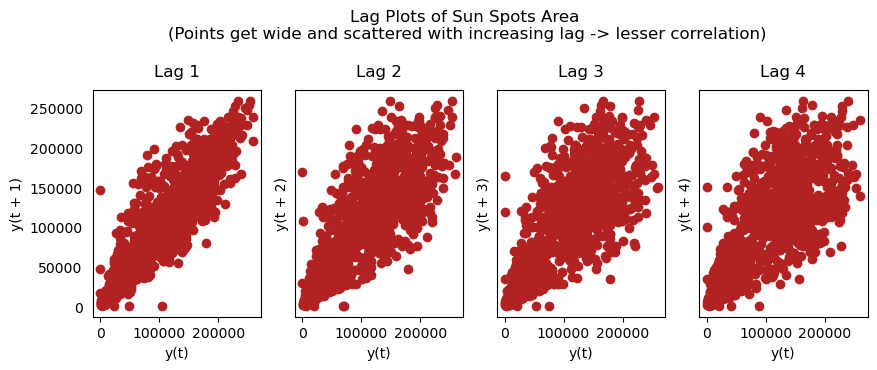

In [47]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(data_TS.comptage_horaire, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

plt.show()

In [59]:
x = data_TS['comptage_horaire']
y = data_TS.index

In [62]:
data_TS.head()

,comptage_horaire
date_comptage,
2018-01-01,1332.0
2018-01-02,4036.0
2018-01-03,3716.0
2018-01-04,3907.0
2018-01-05,5396.0


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# TRAIN TEST MODEL

In [63]:
train = data_TS[data_TS.index < pd.to_datetime("2021-06-01", format='%Y-%m-%d')]
test = data_TS[data_TS.index > pd.to_datetime("2021-05-31", format='%Y-%m-%d')]

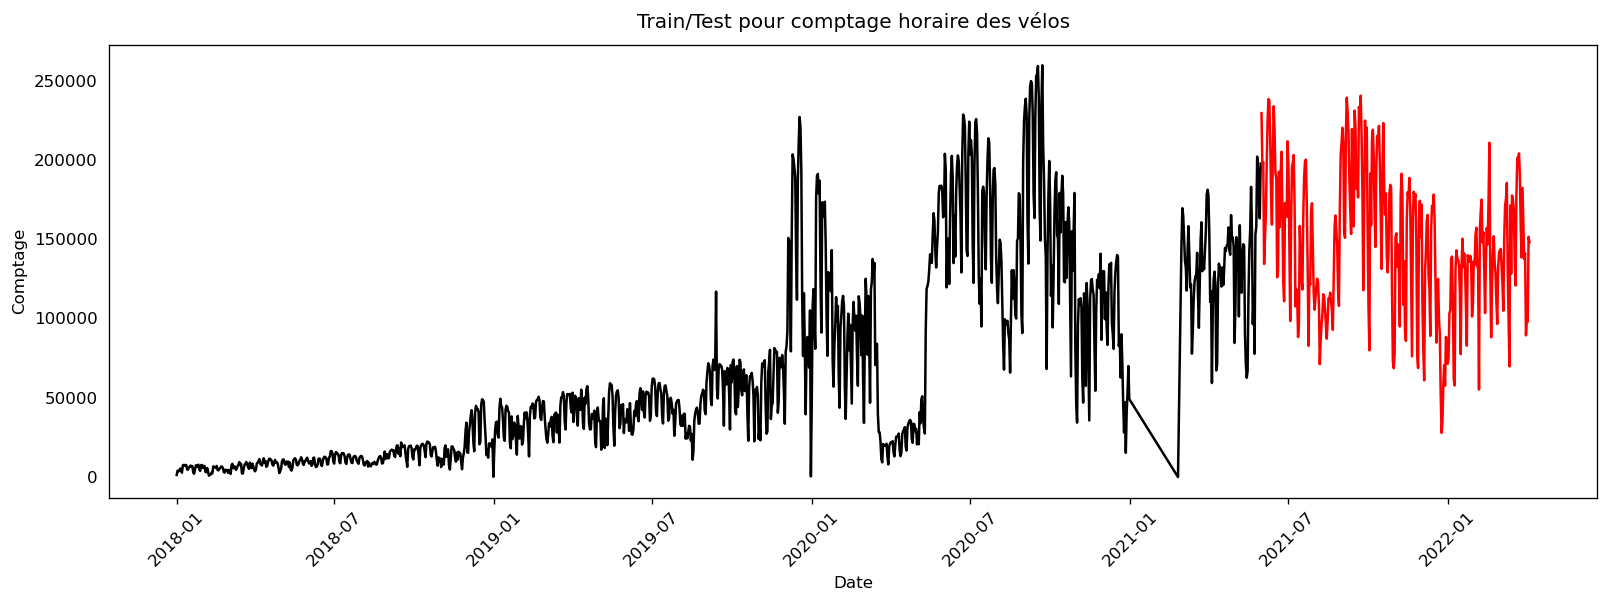

In [66]:
plt.figure(figsize=(16,5))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Comptage')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test pour comptage horaire des vélos")
plt.show()

# ARMA

The term “autoregressive” in ARMA means that the model uses past values to predict future ones. Specifically, predicted values are a weighted linear combination of past values. This type of regression method is similarl to linear regression, with the difference being that the feature inputs here are historical values. 

Moving average refers to the predictions being represented by a weighted, linear combination of white noise terms, where white noise is a random signal. The idea here is that ARMA uses a combination of past values and white noise in order to predict future values. Autoregression models market participant behavior like buying and selling BTC. The white noise models shock events like wars, recessions and political events. 

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [69]:
y = train['comptage_horaire']

In [87]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [88]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


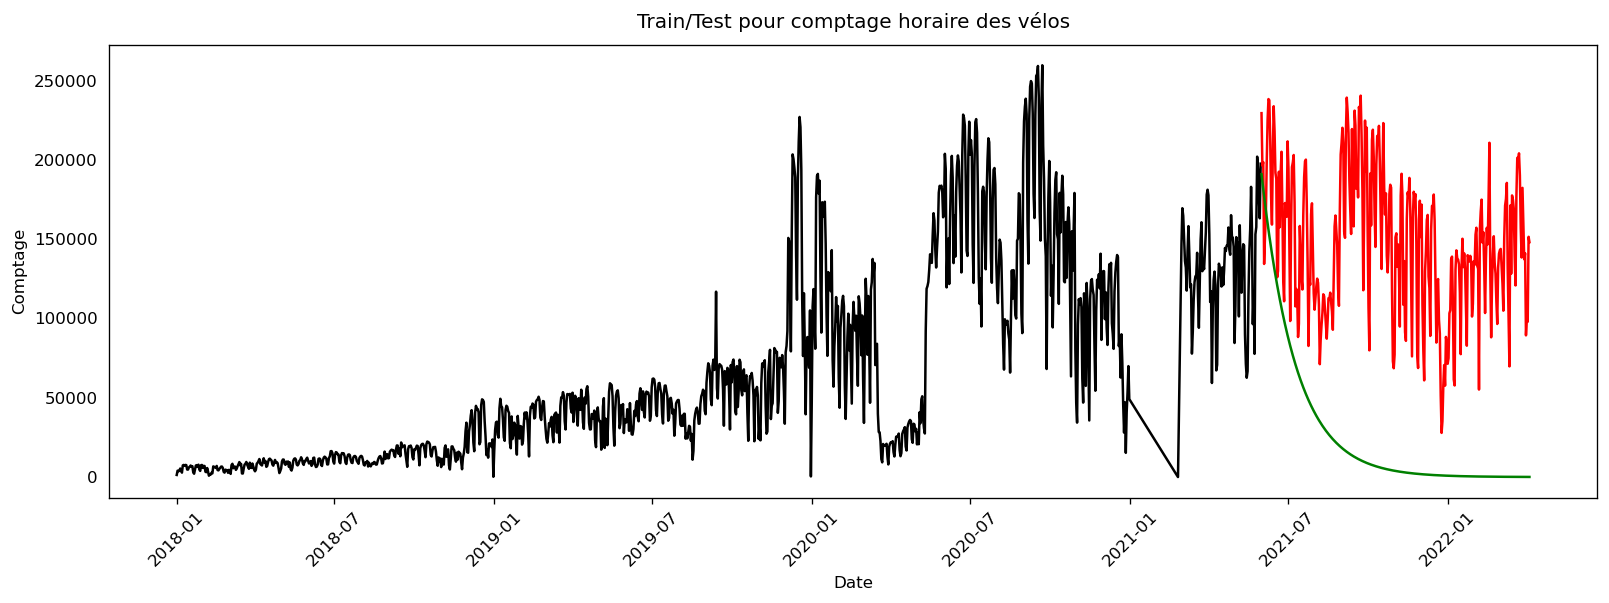

In [89]:
plt.figure(figsize=(16,5))
plt.plot(train, color = "black", label='Training')
plt.plot(test, color = "red", label='Testing')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Comptage')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test pour comptage horaire des vélos")
plt.show()

In [90]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["comptage_horaire"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  132802.49725820645


# ARIMA

In [79]:
from statsmodels.tsa.arima.model import ARIMA

An ARIMA task has three parameters. The first parameter corresponds to the lagging (past values), the second corresponds to differencing (this is what makes non-stationary data stationary), and the last parameter corresponds to the white noise (for modeling shock events). 

Let’s define an ARIMA model with order parameters (2,2,2):

In [91]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["comptage_horaire"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-statio

RMSE:  73211.95882543437


C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


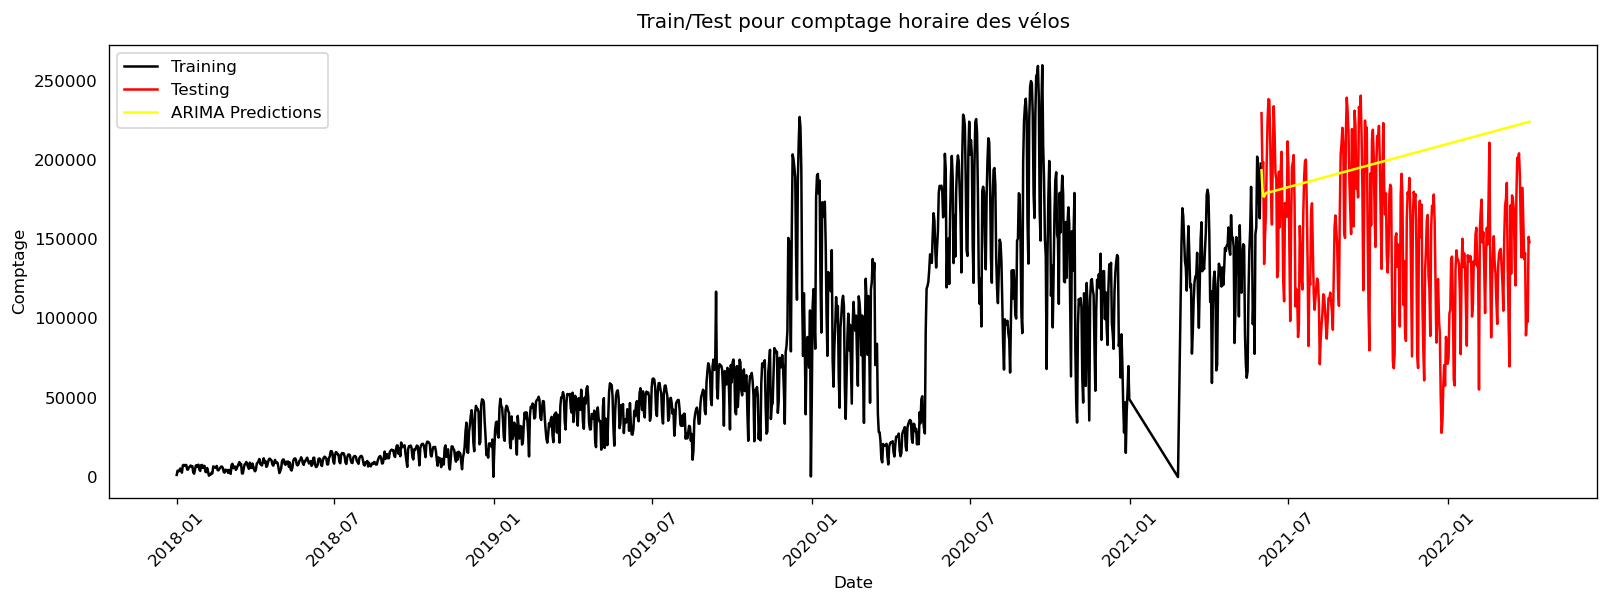

In [92]:
plt.figure(figsize=(16,5))
plt.plot(train, color = "black", label='Training')
plt.plot(test, color = "red", label='Testing')
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('Comptage')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test pour comptage horaire des vélos")

plt.legend()
plt.show()

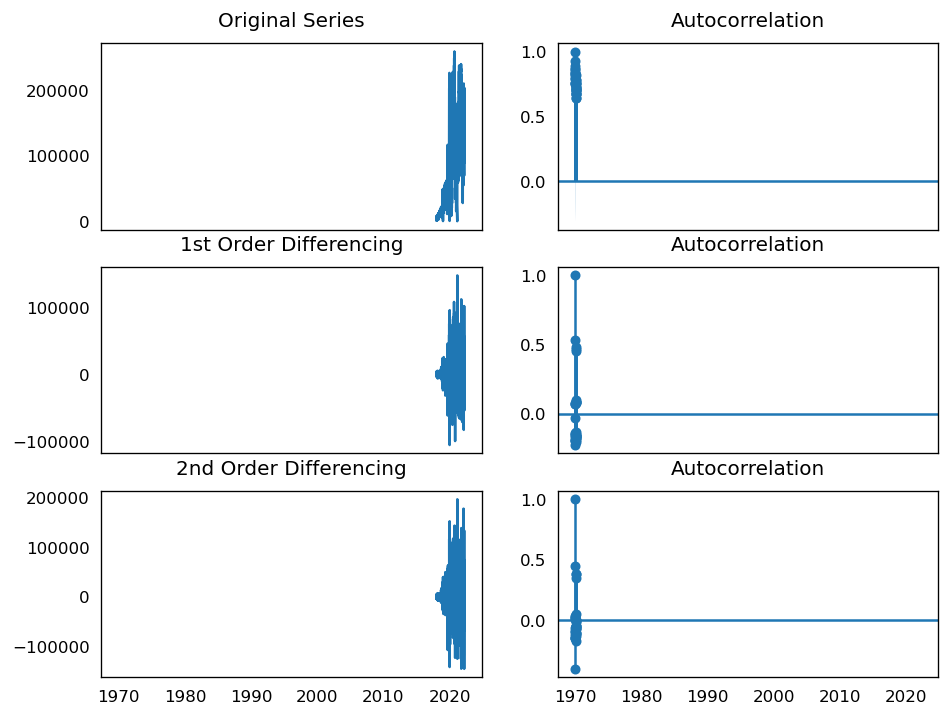

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data_TS.comptage_horaire); axes[0, 0].set_title('Original Series')
plot_acf(data_TS.comptage_horaire, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data_TS.comptage_horaire.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data_TS.comptage_horaire.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data_TS.comptage_horaire.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data_TS.comptage_horaire.diff().diff().dropna(), ax=axes[2, 1])

formatter = mdates.DateFormatter("%Y")
locator = mdates.YearLocator() ### where to put the labels
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
plt.show()

In [ ]:
# # Generate dataset
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')


In [55]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error


KeyError: 'value'

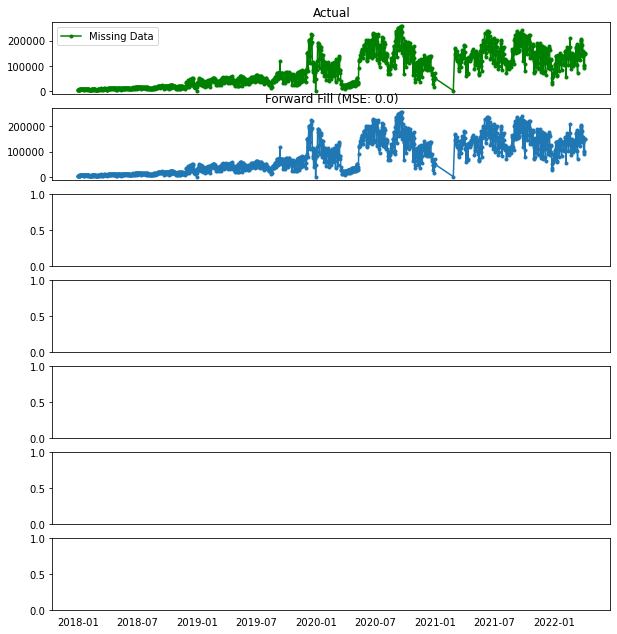

In [59]:
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
data_TS.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = data_TS.ffill()
error = np.round(mean_squared_error(data_TS['comptage_horaire'], df_ffill['comptage_horaire']), 2)
df_ffill['comptage_horaire'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = data_TS.bfill()
error = np.round(mean_squared_error(data_TS['comptage_horaire'], df_bfill['comptage_horaire']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
data_TS['rownum'] = np.arange(data_TS.shape[0])
df_nona = data_TS.dropna(subset = ['comptage_horaire'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

In [ ]:
You could also consider the following approaches depending on how accurate you want the imputations to be.

If you have explanatory variables use a prediction model like the random forest or k-Nearest Neighbors to predict it.
If you have enough past observations, forecast the missing values.
If you have enough future observations, backcast the missing values
Forecast of counterparts from previous cycles.